In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

Here I use some library which is used in this assignment.

In [2]:
from sklearn.datasets import load_boston
boston = load_boston()
X = pd.DataFrame(boston.data, columns=boston.feature_names)

Here I import the independent features(columns) in X and dependent feature in Y

In [3]:
X.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


There isn't "MEDV" column that we will try to predict. Let's add the column to our dataset.

In [4]:
Y=boston.target

Here dependent variable is 'MEDV'

In [5]:
X.shape

(506, 13)

Dimensions of Boston data is 506 is rows and  13 independent features(columns)

In [6]:
X.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT'],
      dtype='object')

Here we can see name of independent columns of Boston dataset. 

In [7]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
dtypes: float64(13)
memory usage: 51.5 KB


Here we can see data type and null value in our dataset.

In [8]:
# Run discriptive statistics of numerical datatypes
X.describe().T

,count,mean,std,min,25%,50%,75%,max
CRIM,506.0,3.613524,8.601545,0.00632,0.082045,0.25651,3.677083,88.9762
ZN,506.0,11.363636,23.322453,0.00000,0.000000,0.00000,12.500000,100.0000
INDUS,506.0,11.136779,6.860353,0.46000,5.190000,9.69000,18.100000,27.7400
CHAS,506.0,0.069170,0.253994,0.00000,0.000000,0.00000,0.000000,1.0000
NOX,506.0,0.554695,0.115878,0.38500,0.449000,0.53800,0.624000,0.8710
RM,506.0,6.284634,0.702617,3.56100,5.885500,6.20850,6.623500,8.7800
AGE,506.0,68.574901,28.148861,2.90000,45.025000,77.50000,94.075000,100.0000
DIS,506.0,3.795043,2.105710,1.12960,2.100175,3.20745,5.188425,12.1265
RAD,506.0,9.549407,8.707259,1.00000,4.000000,5.00000,24.000000,24.0000
TAX,506.0,408.237154,168.537116,187.00000,279.000000,330.00000,666.000000,711.0000


Here we can see number of rows of every features(column), mean,standard deviation,minimum value of each column,1st quaritle,3rd quartile and maximum value of columns.

In [9]:
X.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
dtype: int64

Here we can see that Boston dataset doesn't contain any null value in features.

In [10]:
# Lets Analysis the CHAS variable
X.CHAS.value_counts()/len(X.CHAS)*100

0.0    93.083004
1.0     6.916996
Name: CHAS, dtype: float64

Here we can see that aprox 7% of river(CHAS) and aprox 93% not rivers(CHAS) is present in our dataset

# Now By Here I start Univariate Analysis in our dataset(univariate analysis is defined as when we analyse the dataset by using one feature in our dataset)

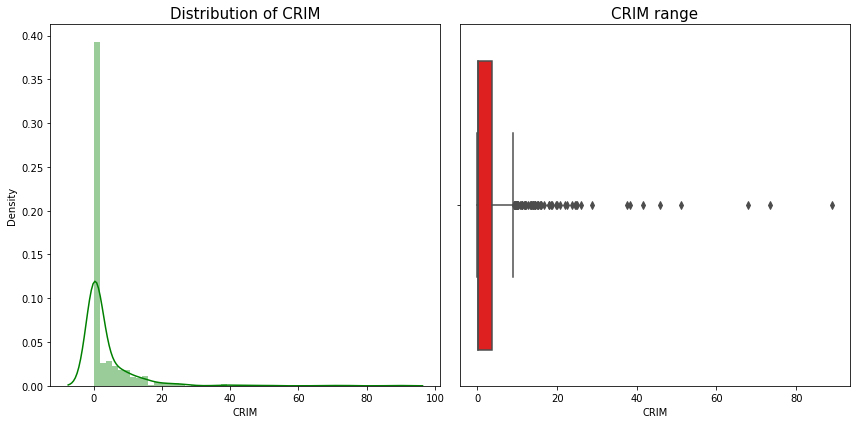

In [11]:
fig, axes = plt.subplots(1,2, figsize=(12,6))
# Distribute of Y
sns.distplot(X.CRIM,hist=True,kde=True,color='g',ax=axes[0])
# To find out the range
sns.boxplot(X.CRIM,color='r',ax=axes[1])
axes[0].set_title('Distribution of CRIM',fontsize=15)
axes[1].set_title('CRIM range',fontsize=15)
plt.tight_layout()
plt.show()

Here we can see in displot the crime rate of our data is very high in 0 to 5 range and 
when we see in boxplot then here some outlier is present in our dataset so now I try to convert outlier value into its upper limit value

In [12]:
q1,q3=X.CRIM.quantile([0.25,0.75])
iqr=q3-q1
ul=q3+1.5*iqr
X.CRIM=np.where(X.CRIM>ul,ul,X.CRIM)

Here we convert the outlier of CRIM feature by its upper limit value

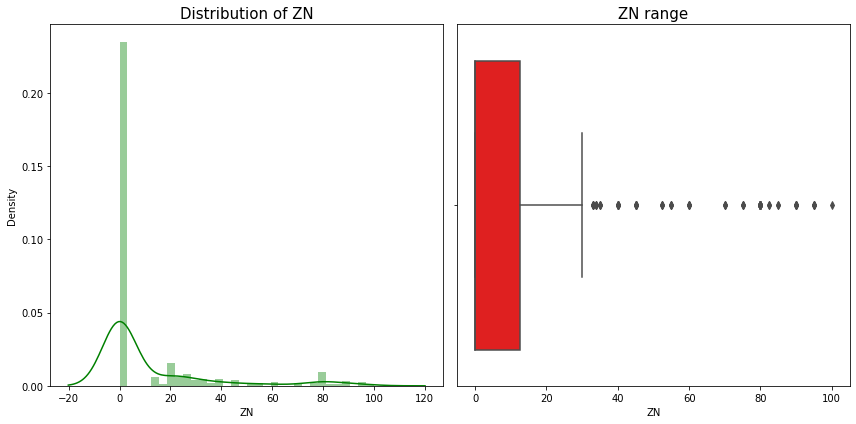

In [13]:
fig, axes = plt.subplots(1,2, figsize=(12,6))
# Distribute of Y
sns.distplot(X.ZN,hist=True,kde=True,color='g',ax=axes[0])
# To find out the range
sns.boxplot(X.ZN,color='r',ax=axes[1])
axes[0].set_title('Distribution of ZN',fontsize=15)
axes[1].set_title('ZN range',fontsize=15)
plt.tight_layout()
plt.show()

Here we can see in displot the proportion of residential of our data is very high in 0 to 5 range and 
in boxplot we have some outlier present in our dataset. So now I try to convert outlier value into its upper limit value.

In [14]:
q1,q3=X.ZN.quantile([0.25,0.75])
iqr=q3-q1
ul=q3+1.5*iqr
X.ZN=np.where(X.ZN>ul,ul,X.ZN)

Here we convert the outlier of ZN feature by its upper limit value.

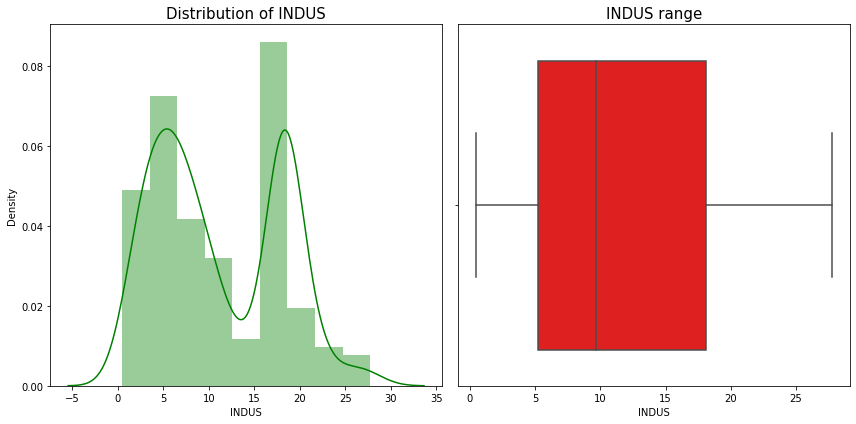

In [15]:
fig, axes = plt.subplots(1,2, figsize=(12,6))
# Distribute of Y
sns.distplot(X.INDUS,hist=True,kde=True,color='g',ax=axes[0])
# To find out the range
sns.boxplot(X.INDUS,color='r',ax=axes[1])
axes[0].set_title('Distribution of INDUS',fontsize=15)
axes[1].set_title('INDUS range',fontsize=15)
plt.tight_layout()
plt.show()

Here we can see in displot the INDUS of our data is very high in 16 to 20 range and in boxplot there is no outlier.So here we don't have to convert the outlier to its upper limit value.

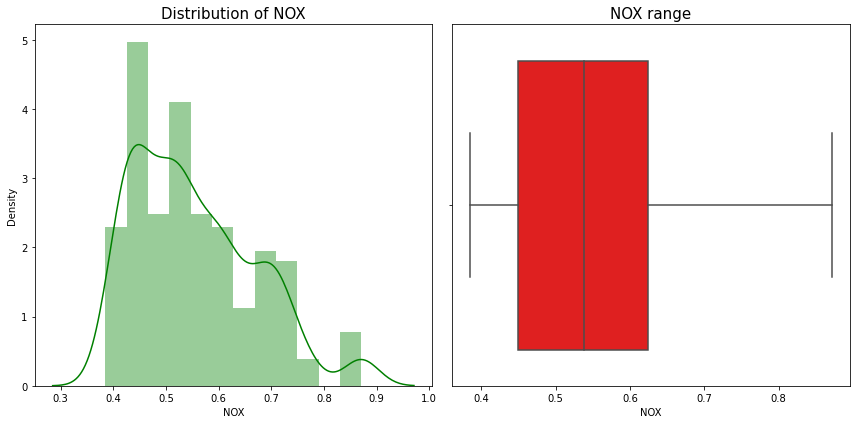

In [16]:
fig, axes = plt.subplots(1,2, figsize=(12,6))
# Distribute of Y
sns.distplot(X.NOX,hist=True,kde=True,color='g',ax=axes[0])
# To find out the range
sns.boxplot(X.NOX,color='r',ax=axes[1])
axes[0].set_title('Distribution of NOX',fontsize=15)
axes[1].set_title('NOX range',fontsize=15)
plt.tight_layout()
plt.show()

Here we can see in displot the NOX of our data is very high in 0.3 to 0.5 range and in boxplot there is no outlier.So here we don't have to convert the outlier to its upper limit value.

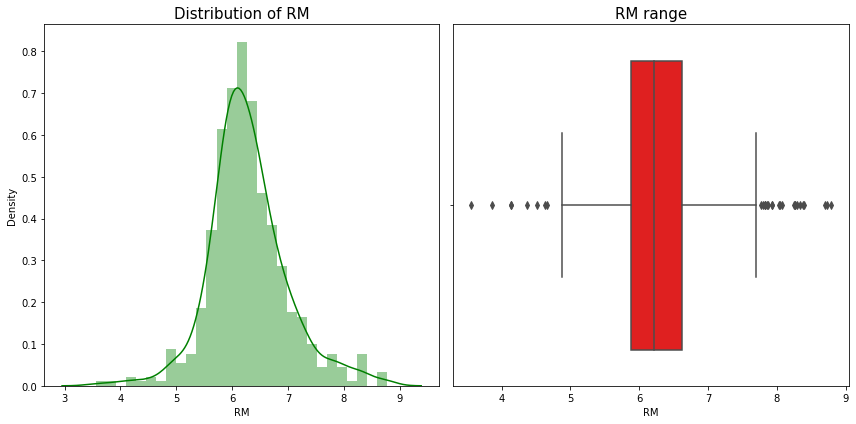

In [17]:
fig, axes = plt.subplots(1,2, figsize=(12,6))
# Distribute of Y
sns.distplot(X.RM,hist=True,kde=True,color='g',ax=axes[0])
# To find out the range
sns.boxplot(X.RM,color='r',ax=axes[1])
axes[0].set_title('Distribution of RM',fontsize=15)
axes[1].set_title('RM range',fontsize=15)
plt.tight_layout()
plt.show()

Here we can see in displot the RM of our data is very high in 6 to 7 and in boxplot some outlier is present in our dataset so now I try to convert outlier value into its upper limit value.

In [18]:
q1,q3=X.RM.quantile([0.25,0.75])
iqr=q3-q1
ul=q3+1.5*iqr
ll=q1-1.5*iqr
X.RM=np.where(X.RM>ul,ul,X.RM)
X.RM=np.where(X.RM<ll,ll,X.RM)

Here we convert the outlier of RM feature by its upper limit value.

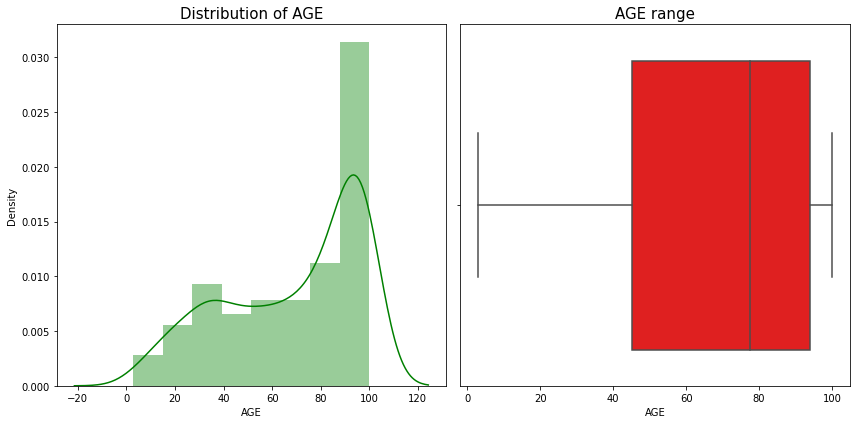

In [19]:
fig, axes = plt.subplots(1,2, figsize=(12,6))
# Distribute of Y
sns.distplot(X.AGE,hist=True,kde=True,color='g',ax=axes[0])
# To find out the range
sns.boxplot(X.AGE,color='r',ax=axes[1])
axes[0].set_title('Distribution of AGE',fontsize=15)
axes[1].set_title('AGE range',fontsize=15)
plt.tight_layout()
plt.show()

Here we can see in displot the AGE of our data is very high in 95 to 100 range and in boxplot there is no outlier.So here we don't have to convert the outlier to its upper limit value.

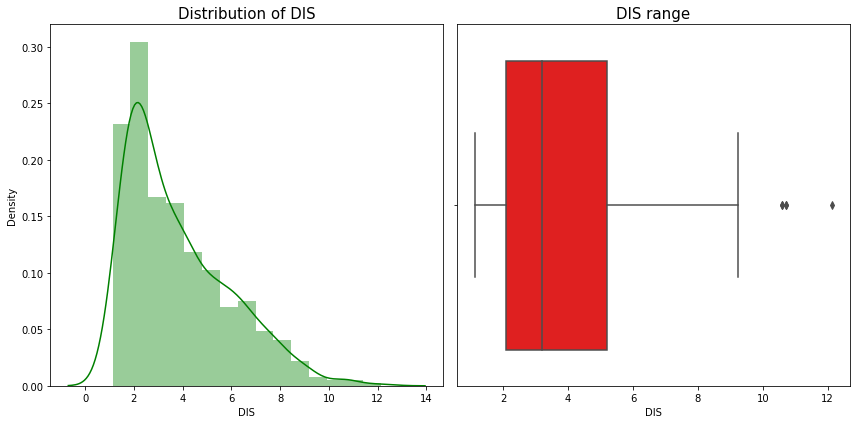

In [20]:
fig, axes = plt.subplots(1,2, figsize=(12,6))
# Distribute of Y
sns.distplot(X.DIS,hist=True,kde=True,color='g',ax=axes[0])
# To find out the range
sns.boxplot(X.DIS,color='r',ax=axes[1])
axes[0].set_title('Distribution of DIS',fontsize=15)
axes[1].set_title('DIS range',fontsize=15)
plt.tight_layout()
plt.show()

Here we can see in displot the DIS of our data is very high in 2 to 3 and in boxplot some outlier is present in our dataset. so now I try to convert outlier value into its upper limit value.

In [21]:
q1,q3=X.DIS.quantile([0.25,0.75])
iqr=q3-q1
ul=q3+1.5*iqr
X.DIS=np.where(X.DIS>ul,ul,X.DIS)

Here we convert the outlier of RM feature by its upper limit value.

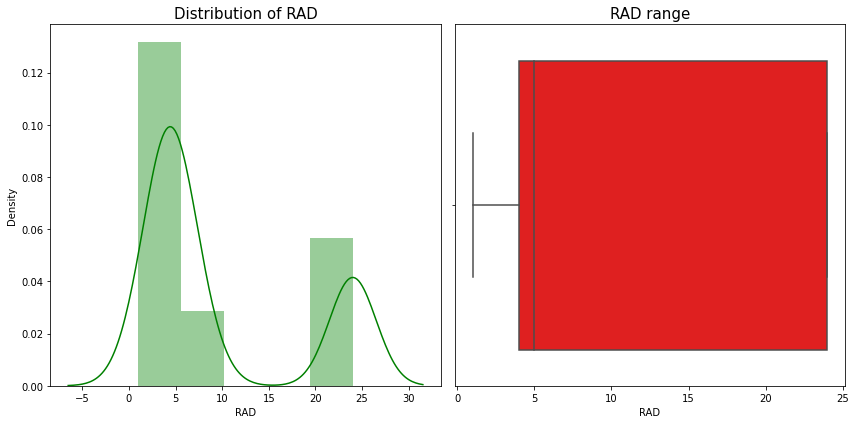

In [22]:
fig, axes = plt.subplots(1,2, figsize=(12,6))
# Distribute of Y
sns.distplot(X.RAD,hist=True,kde=True,color='g',ax=axes[0])
# To find out the range
sns.boxplot(X.RAD,color='r',ax=axes[1])
axes[0].set_title('Distribution of RAD',fontsize=15)
axes[1].set_title('RAD range',fontsize=15)
plt.tight_layout()
plt.show()

Here we can see in displot the RAD of our data is very high in 1 to 5 range and in boxplot there is no outlier.So here we don't have to convert the outlier to its upper limit value.

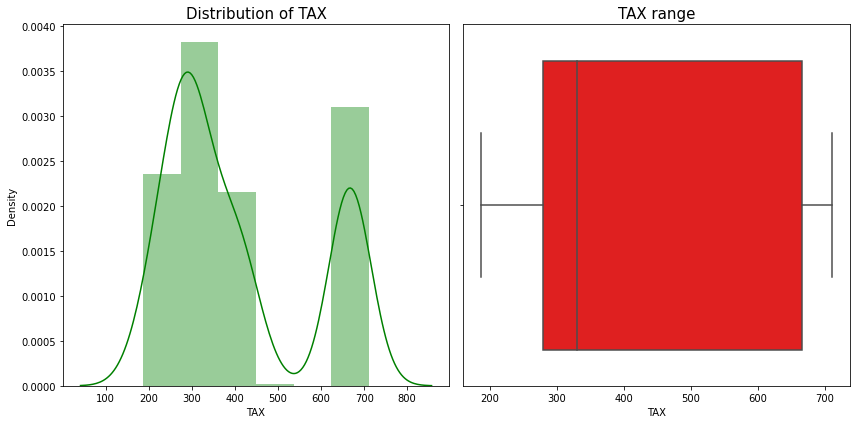

In [23]:
fig, axes = plt.subplots(1,2, figsize=(12,6))
# Distribute of Y
sns.distplot(X.TAX,hist=True,kde=True,color='g',ax=axes[0])
# To find out the range
sns.boxplot(X.TAX,color='r',ax=axes[1])
axes[0].set_title('Distribution of TAX',fontsize=15)
axes[1].set_title('TAX range',fontsize=15)
plt.tight_layout()
plt.show()

Here we can see in displot the TAX of our data is very high in 280 to 350 range and in boxplot there is no outlier.So here we don't have to convert the outlier to its upper limit value.

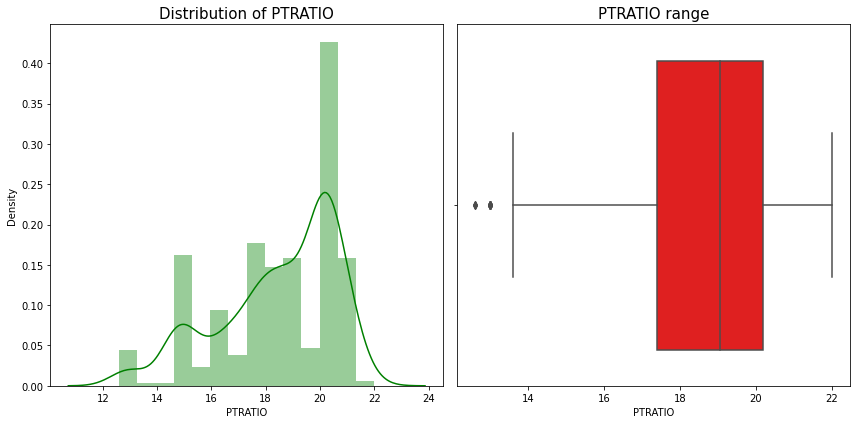

In [24]:
fig, axes = plt.subplots(1,2, figsize=(12,6))
# Distribute of Y
sns.distplot(X.PTRATIO,hist=True,kde=True,color='g',ax=axes[0])
# To find out the range
sns.boxplot(X.PTRATIO,color='r',ax=axes[1])
axes[0].set_title('Distribution of PTRATIO',fontsize=15)
axes[1].set_title('PTRATIO range',fontsize=15)
plt.tight_layout()
plt.show()

Here we can see in displot the PTRATIO of our data is very high in 20 to 21 range and in boxplot there is no outlier.So here we don't have to convert the outlier to its upper limit value.

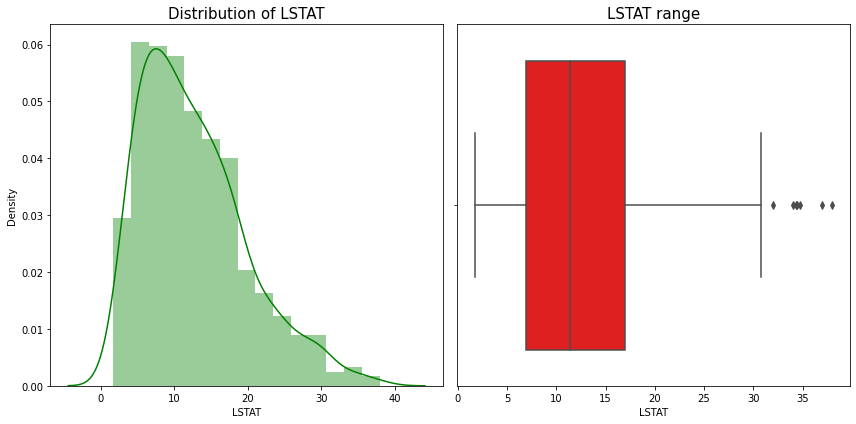

In [25]:
fig, axes = plt.subplots(1,2, figsize=(12,6))
# Distribute of Y
sns.distplot(X.LSTAT,hist=True,kde=True,color='g',ax=axes[0])
# To find out the range
sns.boxplot(X.LSTAT,color='r',ax=axes[1])
axes[0].set_title('Distribution of LSTAT',fontsize=15)
axes[1].set_title('LSTAT range',fontsize=15)
plt.tight_layout()
plt.show()

Here we can see in displot the LSTAT of our data is very high in 5 to 8 and in boxplot some outlier is present in our dataset. so now i try to convert outlier value into its upper limit value

In [26]:
q1,q3=X.LSTAT.quantile([0.25,0.75])
iqr=q3-q1
ul=q3+1.5*iqr
X.LSTAT=np.where(X.LSTAT>ul,ul,X.LSTAT)

Here we convert the outlier of RM feature by its upper limit value.

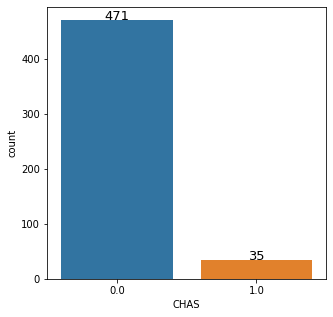

In [27]:
# Lets display Count and plot the graph charles river(CHAS) and not charles river(CHAS) as per the column data
fig,axl=plt.subplots(figsize=(5,5))
graph=sns.countplot(ax=axl,x='CHAS',data=X)
graph.set_xticklabels(graph.get_xticklabels())
for p in graph.patches:
    height = p.get_height()
    graph.text(p.get_x()+p.get_width()/2,height+0.1,height,ha='center',fontsize=13)

Here we can see that 471 river(chas) is connected by town while 10 river is not connected to city.

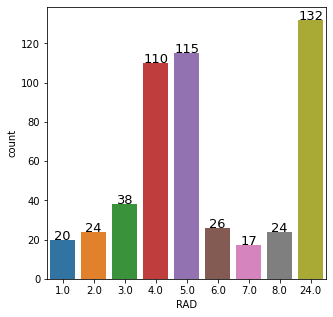

In [28]:
fig,axl=plt.subplots(figsize=(5,5))
graph=sns.countplot(ax=axl,x='RAD',data=X)
graph.set_xticklabels(graph.get_xticklabels())
for p in graph.patches:
    height = p.get_height()
    graph.text(p.get_x()+p.get_width()/2,height+0.1,height,ha='center',fontsize=13)

Here we can see that heighest 132 heighway is connected by city

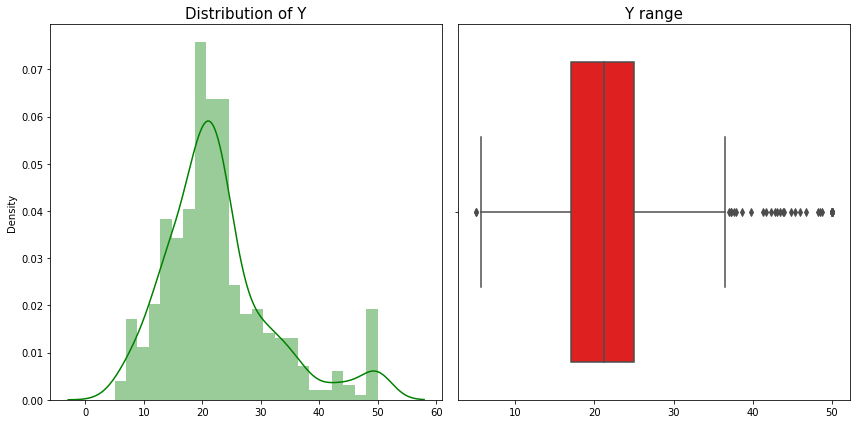

In [29]:
fig, axes = plt.subplots(1,2, figsize=(12,6))
# Distribute of Y
sns.distplot(Y,hist=True,kde=True,color='g',ax=axes[0])
# To find out the range
sns.boxplot(Y,color='r',ax=axes[1])
axes[0].set_title('Distribution of Y',fontsize=15)
axes[1].set_title('Y range',fontsize=15)
plt.tight_layout()
plt.show()

Here we can see in distplot the maximum Y(MEDV) lie between 15 to 20 range and in box plot some outliers are present, so here we need to remove the outlier in Y.

In [30]:
for i in range(len(Y)):
    if Y[i]>35:
        Y[i]=35

Here we remove the outlier in Y(MEDV) by it's maximum value of Y

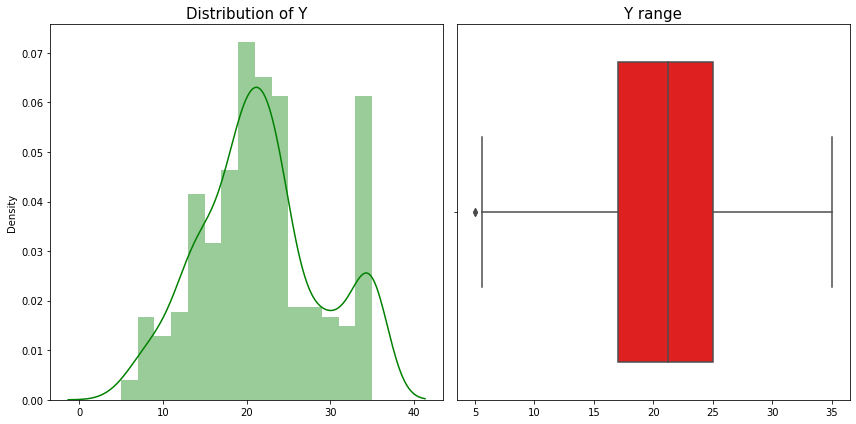

In [31]:
fig, axes = plt.subplots(1,2, figsize=(12,6))
# Distribute of Y
sns.distplot(Y,hist=True,kde=True,color='g',ax=axes[0])
# To find out the range
sns.boxplot(Y,color='r',ax=axes[1])
axes[0].set_title('Distribution of Y',fontsize=15)
axes[1].set_title('Y range',fontsize=15)
plt.tight_layout()
plt.show()

After Removing the outlier we can see that maximum Y(MEDV) is lie between 20 to 25 and no outliers present in boxplot.

# Here we are doing Bivariate Analysis in our dataset (bivariate is defined as when we consider two feature at one time that is known as bivariate analysis)

			MEDV V/S CRIM


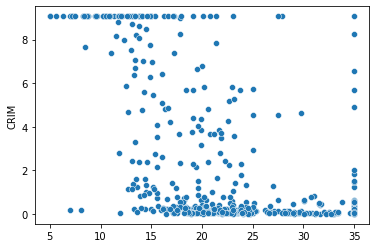

			MEDV V/S ZN


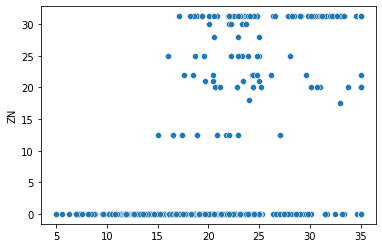

			MEDV V/S INDUS


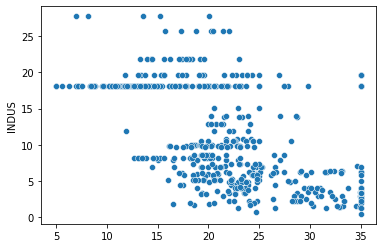

			MEDV V/S CHAS


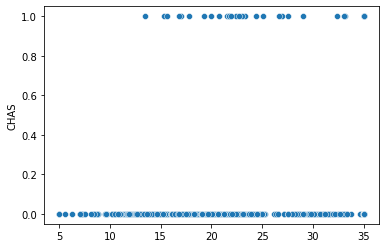

			MEDV V/S NOX


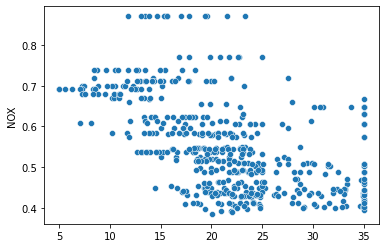

			MEDV V/S RM


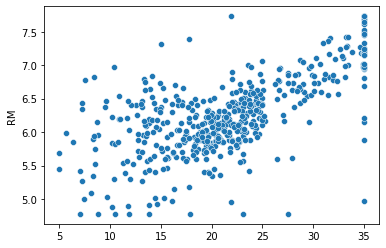

			MEDV V/S AGE


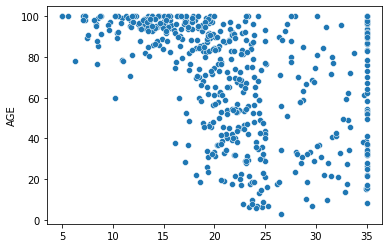

			MEDV V/S DIS


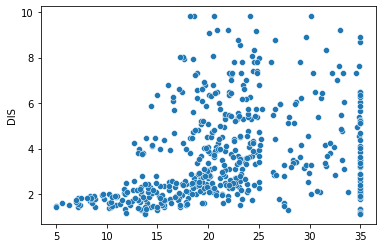

			MEDV V/S RAD


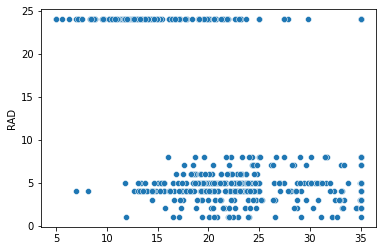

			MEDV V/S TAX


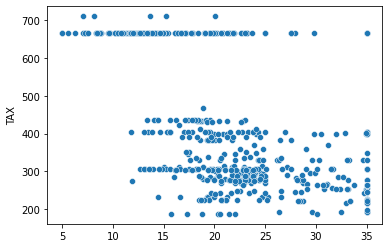

			MEDV V/S PTRATIO


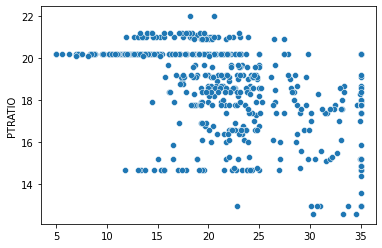

			MEDV V/S B


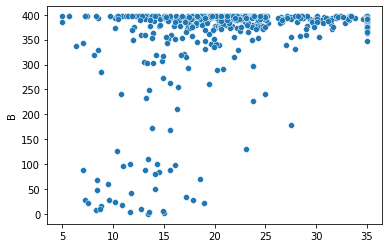

			MEDV V/S LSTAT


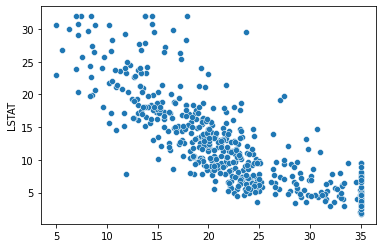

In [32]:
for i in X.columns:
    print(f'\t\t\tMEDV V/S {i}')
    sns.scatterplot(x=Y,y=X[i])
    plt.show()
    

By doing this bivariate analysis we can see that how independent variable is varies with respect to dependent variable(MEDV).

			MEDV V/S CRIM


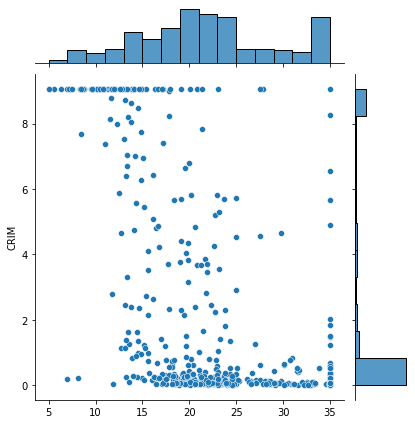

			MEDV V/S ZN


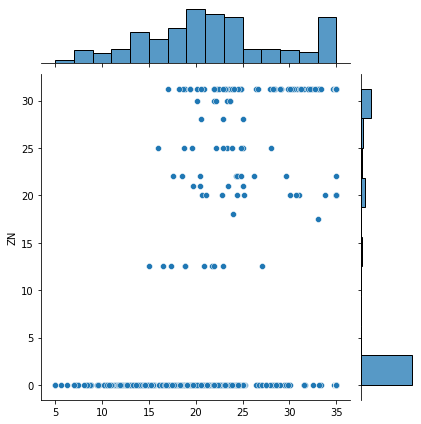

			MEDV V/S INDUS


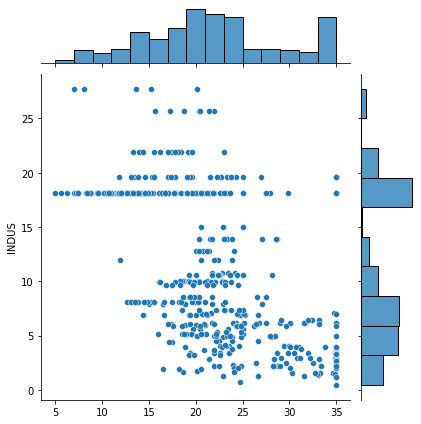

			MEDV V/S CHAS


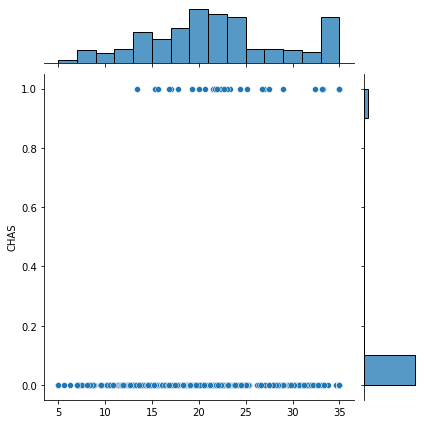

			MEDV V/S NOX


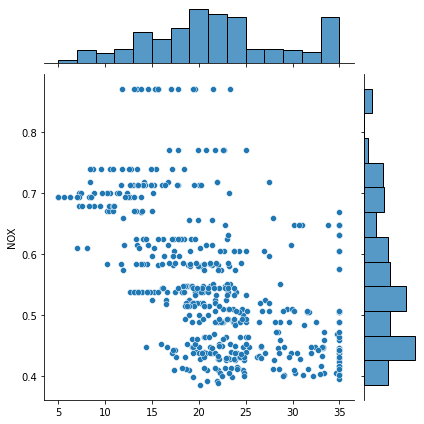

			MEDV V/S RM


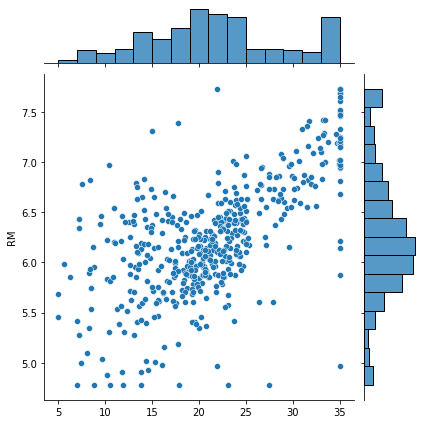

			MEDV V/S AGE


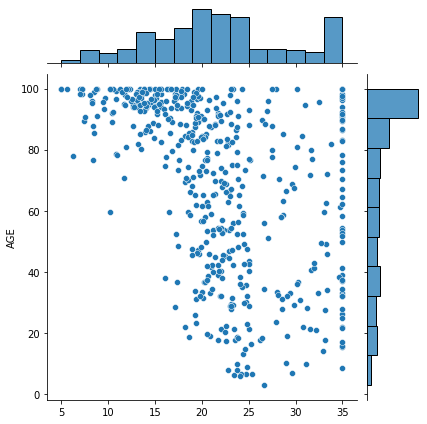

			MEDV V/S DIS


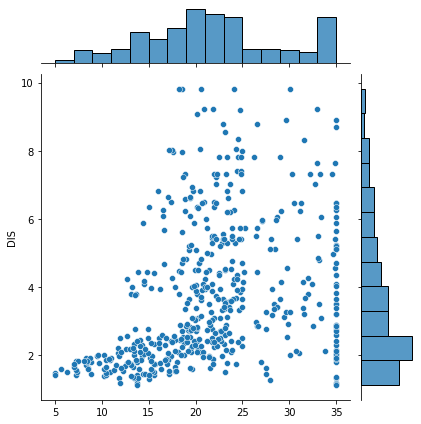

			MEDV V/S RAD


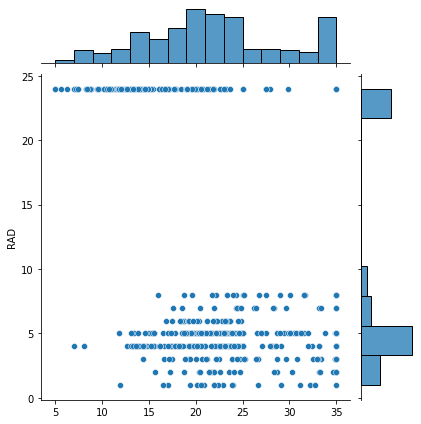

			MEDV V/S TAX


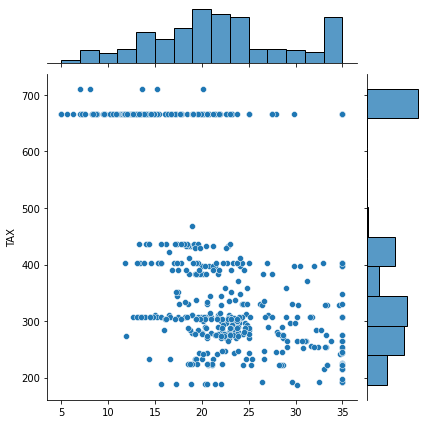

			MEDV V/S PTRATIO


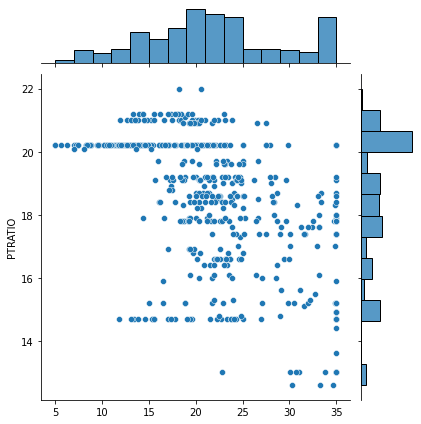

			MEDV V/S B


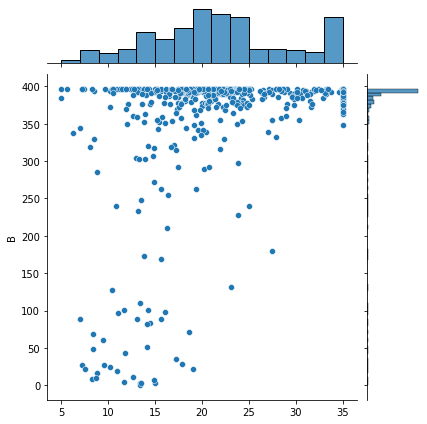

			MEDV V/S LSTAT


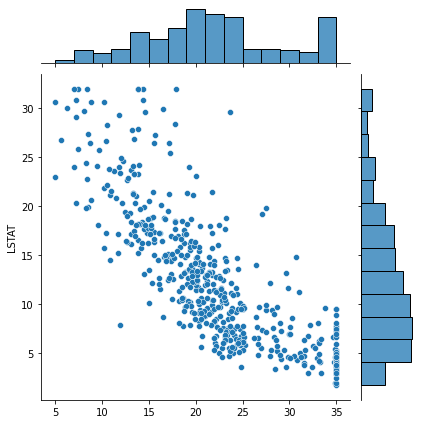

In [33]:
for i in X.columns:
    print(f'\t\t\tMEDV V/S {i}')
    sns.jointplot(x=Y,y=X[i])
    plt.show()
    

Here we use jointplot for see the relation between dependent variable(MEDV) and independent variables. in this plot we can see that three plot is present one plot like scatter plot this is give relation between dependent variable to independent variable and horizontal plot is show how much our data is distributed.

In [34]:
corr = X.corr()
corr.style.background_gradient(cmap='coolwarm').set_precision(2)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
CRIM,1.00,-0.37,0.63,-0.03,0.66,-0.26,0.52,-0.56,0.93,0.87,0.41,-0.51,0.59
ZN,-0.37,1.00,-0.58,-0.04,-0.55,0.36,-0.58,0.68,-0.34,-0.38,-0.43,0.21,-0.45
INDUS,0.63,-0.58,1.00,0.06,0.76,-0.41,0.64,-0.71,0.60,0.72,0.38,-0.36,0.61
CHAS,-0.03,-0.04,0.06,1.00,0.09,0.08,0.09,-0.10,-0.01,-0.04,-0.12,0.05,-0.05
NOX,0.66,-0.55,0.76,0.09,1.00,-0.32,0.73,-0.78,0.61,0.67,0.19,-0.38,0.60
RM,-0.26,0.36,-0.41,0.08,-0.32,1.00,-0.26,0.22,-0.21,-0.29,-0.36,0.12,-0.63
AGE,0.52,-0.58,0.64,0.09,0.73,-0.26,1.00,-0.75,0.46,0.51,0.26,-0.27,0.61
DIS,-0.56,0.68,-0.71,-0.10,-0.78,0.22,-0.75,1.00,-0.50,-0.54,-0.24,0.30,-0.50
RAD,0.93,-0.34,0.60,-0.01,0.61,-0.21,0.46,-0.50,1.00,0.91,0.46,-0.44,0.49
TAX,0.87,-0.38,0.72,-0.04,0.67,-0.29,0.51,-0.54,0.91,1.00,0.46,-0.44,0.55


Here We find the corelation between independent variable. correlation is show that how many one variable is  related with other remaining variable.

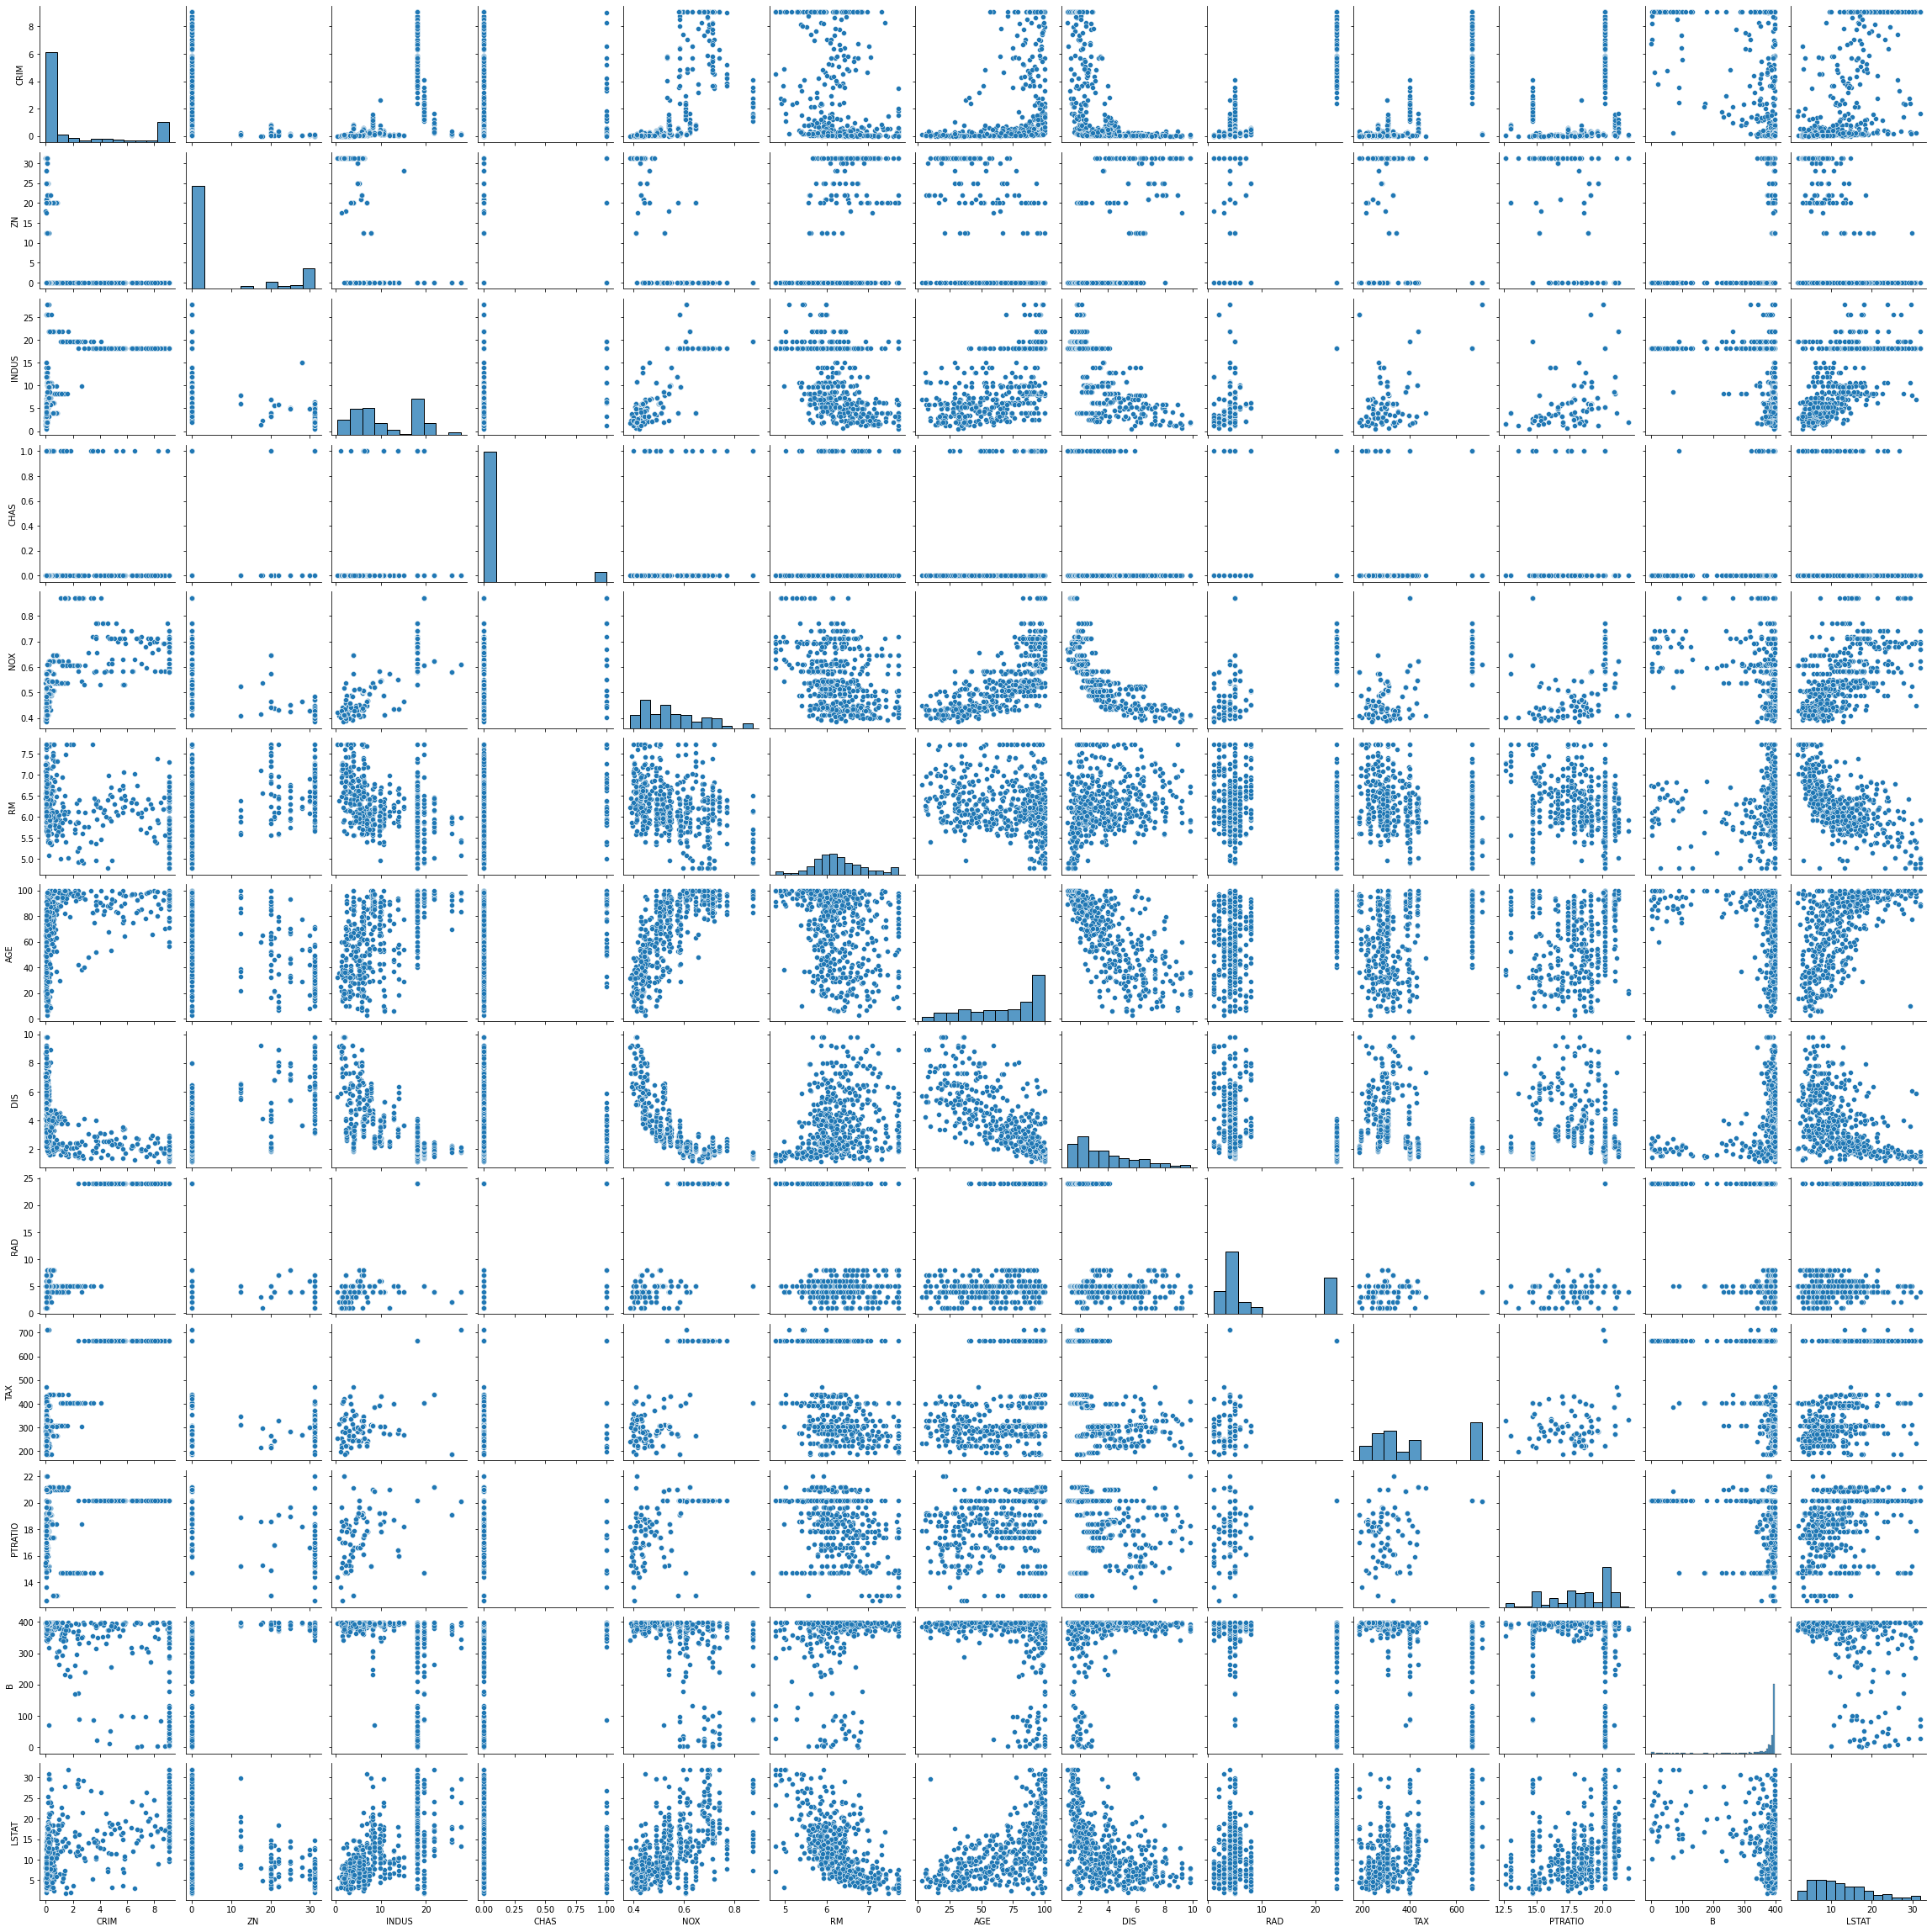

In [35]:
sns.pairplot(X)
plt.show()

Here I use pairplot which is show each type of graph which is related between dependent variable and independent variable.

In [36]:
# It will returns the total number of the duplicates in the dataset
X.duplicated().sum()

0

Here we can see that no any duplicate features is present in our dataset.

# Now Here we are doing Feature Selection(feature selection is defined as select the useable feature(column) and remove the unuseable feature.)

In [37]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.feature_selection import RFE
rfe=RFE(DecisionTreeRegressor(), 8)
rfe_fit=rfe.fit(X,Y)
print("RFE Support:", rfe_fit.support_)
print("\n RFE Ranking: ", rfe_fit.ranking_)
print("\n Original Feature List: ",list(X))

RFE Support: [False False False False  True  True  True  True False  True  True  True
  True]

 RFE Ranking:  [2 6 3 5 1 1 1 1 4 1 1 1 1]

 Original Feature List:  ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']


Here we can see that 'CRIM', 'ZN', 'INDUS', 'CHAS' and 'TAX' is non useable features so we try to remove this feature from our dataset.

In [38]:
x=X.drop(['CRIM', 'ZN', 'INDUS', 'CHAS','TAX'],axis=1)
x.head()

,NOX,RM,AGE,DIS,RAD,PTRATIO,B,LSTAT
0,0.538,6.575,65.2,4.0900,1.0,15.3,396.90,4.98
1,0.469,6.421,78.9,4.9671,2.0,17.8,396.90,9.14
2,0.469,7.185,61.1,4.9671,2.0,17.8,392.83,4.03
3,0.458,6.998,45.8,6.0622,3.0,18.7,394.63,2.94
4,0.458,7.147,54.2,6.0622,3.0,18.7,396.90,5.33


Here I remove the unuseable feature like 'CRIM', 'ZN', 'INDUS', 'CHAS' and 'TAX' and display the useable feature.

# Now I make the model for this dataset.

In [39]:
from sklearn.model_selection import train_test_split

In [40]:
x_train,x_test,y_train,y_test=train_test_split(x,Y,test_size=0.25,random_state=0)

Here I divide the our dependent and independent feature in two part one is training part and another is testing part

In [41]:
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

(379, 8) (127, 8) (379,) (127,)


Here we can see that number of training data and testing data in independent variable and independent variable.

In [42]:
from sklearn.ensemble import RandomForestRegressor

In [43]:
model=RandomForestRegressor()

Here I use RandomForestRegressor for predict the model.

In [44]:
model.fit(x_train,y_train)

RandomForestRegressor()

In [45]:
y_pred=model.predict(x_test)

In [46]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [47]:
mean_absolute_error(y_test,y_pred)

2.344385826771654

Here we can see mean absolute error of this dataset.

# Now I Check Feature importance of our Dataset.

Text(0.5, 0, 'Importance Feature')

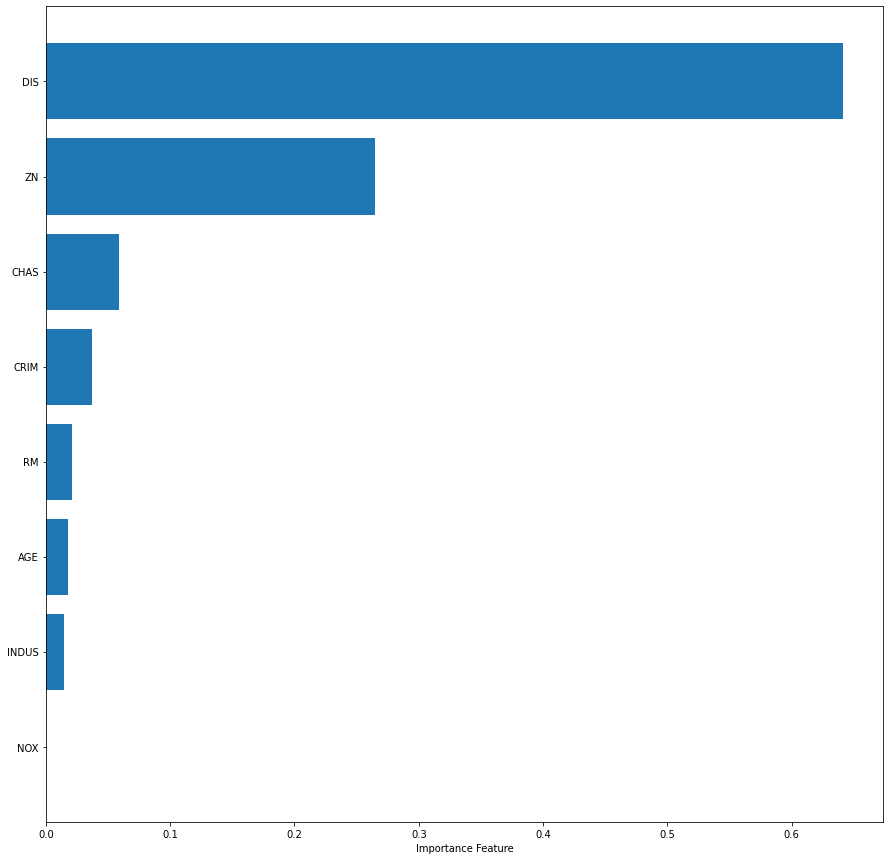

In [48]:
from sklearn.inspection import permutation_importance

perm_importance = permutation_importance(model, x_test, y_test)

sorted_idx = perm_importance.importances_mean.argsort()
plt.figure(figsize=[15,15])
plt.barh(boston.feature_names[sorted_idx], perm_importance.importances_mean[sorted_idx])
plt.xlabel("Importance Feature")

Here I am doing see the most importance features in this dataset. In this dataset we can see the most importance feature is DIS.

In [49]:
import pickle 
pickle_out = open("app.pkl", mode = "wb") 
pickle.dump(model, pickle_out) 
pickle_out.close()

Here I am making pickle file which we can use for deploy the our model on any service or library like aws,streamlit or Flask etc.